In [1]:
import numpy as np
import pandas as pd
import os
import pickle
import sys
import scipy.stats as stats
import matplotlib.pylab as plt
%matplotlib inline

In [3]:
os.getcwd()
os.listdir()

['.Rhistory',
 'js1_bi.csv',
 'BreakPointDistance.csv',
 'Bipartite_graph.ipynb',
 'Junction_Sequences_NTRK1_nonCRC_4_19_20_deid.xlsx',
 '.DS_Store',
 'Table1.rds',
 'data_Junction_Regions_CRC_4_19_20_deid.fa',
 'nonCRC_Table1.pkl',
 '5_10kb_plot.ipynb',
 'Fusion_Gene_ NTRK1_partners.ipynb',
 'Genome Screenshots',
 'Fusion_Gene_nonCRC.ipynb',
 'Junction_Sequences_CRC_4_19_20_deid.xlsx',
 'js1_count.pkl',
 'Bed_files_for_USCS_plot.ipynb',
 '.RData',
 'nonCRC_gene1_bed',
 'CRC_gene1_bed',
 'Table1.pkl',
 'CRC_gene2_bed',
 '.ipynb_checkpoints',
 'humanFreq.png',
 'CRC_gene1_bed.zip',
 'Fusion_Gene_R.ipynb',
 'Fusion_Gene_CRC.ipynb',
 'MSS_MSI_review.pptx',
 'Re__Windows_in_oncogenic_gene..zip',
 'Fusion_Gene_R.R',
 'data_Junction_Regions_CRC_4_19_20_deid_J2.fa',
 'CeCe_Proj']

# Read FASTA file with biopython

In [2]:
from Bio import SeqIO

In [3]:
with open("data_Junction_Regions_CRC_4_19_20_deid.fa") as handle:
    Seqs = pd.Series([str(record.seq) for record in SeqIO.parse(handle,"fasta")])
with open("data_Junction_Regions_CRC_4_19_20_deid.fa") as handle:
    IDs = pd.Series([record.id for record in SeqIO.parse(handle,"fasta")])
J1_tbl = pd.DataFrame({'IDs': IDs, "50+1+50": Seqs})
J1_tbl.head()

,IDs,50+1+50
0,chr10:43611864-43611964:XRN:6SJTT7:MSI-H:J1:G1,CTGCCCAGGGCAGAGACAGGCAGCGTTGCCGCTGGCTCAGATGACA...
1,chr7:138268017-138268117:XRN:6SJTT7:MSI-H:J1:G2,AAGAAAAAAATCTAGATGATTAAGAGGAAATATGTGAAGACAAGTT...
2,chr7:140489379-140489479:XRN:DNF6WD:MSS:J1:G1,AACTTTCCATTCTTGAGAGCTTACAATCTCATGGGAAGTAAGATGC...
3,chr7:138253042-138253142:XRN:DNF6WD:MSS:J1:G2,ATTTTTAGTAGAGACTGGGTTTCACCGTGTTAGCCAGGATGGTCTC...
4,chr10:43611746-43611846:XRN:E3F52H:MSI,GGGCAGGGGTCAGGGGAGACAGTAGACCAGGAACCAGAGAGGGTCG...


In [31]:
for record in SeqIO.parse("data_Junction_Regions_CRC_4_19_20_deid.fa","fasta"):
    print(record.id)
    print(record.seq)

chr10:43611864-43611964:XRN:6SJTT7:MSI-H:J1:G1
CTGCCCAGGGCAGAGACAGGCAGCGTTGCCGCTGGCTCAGATGACAGCCGGTTCTCTGCACATTGGAACTTGTCCATGGGGCCTCCTTTAAGGGTCTTGCC
chr7:138268017-138268117:XRN:6SJTT7:MSI-H:J1:G2
AAGAAAAAAATCTAGATGATTAAGAGGAAATATGTGAAGACAAGTTTTTTCATTAAAAATAATTGGGGCTGGGTGCAGTGGCTCACGCCTGTAATCCCAAC
chr7:140489379-140489479:XRN:DNF6WD:MSS:J1:G1
AACTTTCCATTCTTGAGAGCTTACAATCTCATGGGAAGTAAGATGCACACATTGGAAGTAAGTGAAAATCAAATAATTTAAGAATAATTGCATAAGAATAT
chr7:138253042-138253142:XRN:DNF6WD:MSS:J1:G2
ATTTTTAGTAGAGACTGGGTTTCACCGTGTTAGCCAGGATGGTCTCAATCTCCTAAACTCGTAAGCCACCGTACCTGGCCTCCTTTTTTTTTTTTTTTTTT
chr10:43611746-43611846:XRN:E3F52H:MSI
GGGCAGGGGTCAGGGGAGACAGTAGACCAGGAACCAGAGAGGGTCGAAGTACTGAGTCCAAGCCATGCTGTGACCACACCTGTCATGTAGCAGCTTTCAGG
chr10:51587911-51588011:XRN:E3F52H:MSI
CTGGCTTCAACTTAGCCACCAGTGGCCAGGTGCAGTGGCTCAGGCCTGCAATTCCAGCACTTTGGGAGGCAGAGGTAGGAAGATTGCTTGAGCCAAGGAGT
chr7:140482415-140482515:XRN:MU1VY9:MSI
AGGTTTGTTACATACGTATACATGTGCCATGGTGGATTCATTTTGCAGAAGAAAGTTGATTTTTTAAATAGGGAAGAATGTCC

In [27]:
print(record)
len(record)

ID: chr7:102724318-102724418:XRN:T52CP1:MSS:J1:G2
Name: chr7:102724318-102724418:XRN:T52CP1:MSS:J1:G2
Description: chr7:102724318-102724418:XRN:T52CP1:MSS:J1:G2
Number of features: 0
Seq('ACACACTAGCGGTAATTGTGACCCTGAATAAATTACTTAACCTCTCAGACCCTC...ATG', SingleLetterAlphabet())


101

In [28]:
records = list(SeqIO.parse("data_Junction_Regions_CRC_4_19_20_deid.fa","fasta"))
print(records[0])
len(records)

ID: chr10:43611864-43611964:XRN:6SJTT7:MSI-H:J1:G1
Name: chr10:43611864-43611964:XRN:6SJTT7:MSI-H:J1:G1
Description: chr10:43611864-43611964:XRN:6SJTT7:MSI-H:J1:G1
Number of features: 0
Seq('CTGCCCAGGGCAGAGACAGGCAGCGTTGCCGCTGGCTCAGATGACAGCCGGTTC...GCC', SingleLetterAlphabet())


490

In [32]:
J1_tbl = pd.DataFrame(records)
J1_tbl.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,C,T,G,C,C,C,A,G,G,G,...,G,G,G,T,C,T,T,G,C,C
1,A,A,G,A,A,A,A,A,A,A,...,T,A,A,T,C,C,C,A,A,C
2,A,A,C,T,T,T,C,C,A,T,...,A,T,A,A,G,A,A,T,A,T
3,A,T,T,T,T,T,A,G,T,A,...,T,T,T,T,T,T,T,T,T,T
4,G,G,G,C,A,G,G,G,G,T,...,A,G,C,T,T,T,C,A,G,G


In [29]:
print(records)

[SeqRecord(seq=Seq('CTGCCCAGGGCAGAGACAGGCAGCGTTGCCGCTGGCTCAGATGACAGCCGGTTC...GCC', SingleLetterAlphabet()), id='chr10:43611864-43611964:XRN:6SJTT7:MSI-H:J1:G1', name='chr10:43611864-43611964:XRN:6SJTT7:MSI-H:J1:G1', description='chr10:43611864-43611964:XRN:6SJTT7:MSI-H:J1:G1', dbxrefs=[]), SeqRecord(seq=Seq('AAGAAAAAAATCTAGATGATTAAGAGGAAATATGTGAAGACAAGTTTTTTCATT...AAC', SingleLetterAlphabet()), id='chr7:138268017-138268117:XRN:6SJTT7:MSI-H:J1:G2', name='chr7:138268017-138268117:XRN:6SJTT7:MSI-H:J1:G2', description='chr7:138268017-138268117:XRN:6SJTT7:MSI-H:J1:G2', dbxrefs=[]), SeqRecord(seq=Seq('AACTTTCCATTCTTGAGAGCTTACAATCTCATGGGAAGTAAGATGCACACATTG...TAT', SingleLetterAlphabet()), id='chr7:140489379-140489479:XRN:DNF6WD:MSS:J1:G1', name='chr7:140489379-140489479:XRN:DNF6WD:MSS:J1:G1', description='chr7:140489379-140489479:XRN:DNF6WD:MSS:J1:G1', dbxrefs=[]), SeqRecord(seq=Seq('ATTTTTAGTAGAGACTGGGTTTCACCGTGTTAGCCAGGATGGTCTCAATCTCCT...TTT', SingleLetterAlphabet()), id='chr7:138253042-138

In [42]:
with open("data_Junction_Regions_CRC_4_19_20_deid.fa", "rU") as handle:
    Seqs = [record.seq for record in SeqIO.parse(handle,"fasta")]
print(len(Seqs))
str(Seqs)

490


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 'U' mode is deprecated
  """Entry point for launching an IPython kernel.


"[Seq('CTGCCCAGGGCAGAGACAGGCAGCGTTGCCGCTGGCTCAGATGACAGCCGGTTC...GCC', SingleLetterAlphabet()), Seq('AAGAAAAAAATCTAGATGATTAAGAGGAAATATGTGAAGACAAGTTTTTTCATT...AAC', SingleLetterAlphabet()), Seq('AACTTTCCATTCTTGAGAGCTTACAATCTCATGGGAAGTAAGATGCACACATTG...TAT', SingleLetterAlphabet()), Seq('ATTTTTAGTAGAGACTGGGTTTCACCGTGTTAGCCAGGATGGTCTCAATCTCCT...TTT', SingleLetterAlphabet()), Seq('GGGCAGGGGTCAGGGGAGACAGTAGACCAGGAACCAGAGAGGGTCGAAGTACTG...AGG', SingleLetterAlphabet()), Seq('CTGGCTTCAACTTAGCCACCAGTGGCCAGGTGCAGTGGCTCAGGCCTGCAATTC...AGT', SingleLetterAlphabet()), Seq('AGGTTTGTTACATACGTATACATGTGCCATGGTGGATTCATTTTGCAGAAGAAA...AAA', SingleLetterAlphabet()), Seq('GTCGCCTCCGCGCCTCTGCGCCGTTCCCATTCCGCCCCAGATTGCTTCCTGCTC...TAG', SingleLetterAlphabet()), Seq('GACCTGTTTCTCCCAGGCCTGCCCTTTGATTTCGGGTTCTACTCGCTTTGCCCG...ACC', SingleLetterAlphabet()), Seq('CTTGCTTCAGCCTCCTGAGTAGCAGGAACTATAGGTGTGCATCACCATGCCTGG...ATA', SingleLetterAlphabet()), Seq('CTCCCTCCAGCTGCGCCCTGACCTCCTGCTGTTGCTCTTTCTGGCCCACAGTCC...TGC', 

In [49]:
with open("data_Junction_Regions_CRC_4_19_20_deid.fa", "rU") as handle:
    IDs = [record.id for record in SeqIO.parse(handle,"fasta")]
len(IDs)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 'U' mode is deprecated
  """Entry point for launching an IPython kernel.


490

In [67]:
print(type(record.seq))
str(record.seq)

<class 'Bio.Seq.Seq'>


'ACACACTAGCGGTAATTGTGACCCTGAATAAATTACTTAACCTCTCAGACCCTCAATTTCCTCATCTGTGCAATGTGGCTACTTATACTTAAAACATAATG'

In [77]:
J1_tbl.iloc[0,1][50]

'G'

# GC content related functions

In [4]:
def cound_mononucleotide(i):
    A_ct = i.count('A') + i.count('a')
    T_ct = i.count('T') + i.count('t')
    C_ct = i.count('C') + i.count('c')
    G_ct = i.count('G') + i.count('g')
    tmp = {'A':A_ct, 'T':T_ct, 'C':C_ct,'G':G_ct}
    return tmp
def count_mono_series(indexed):
    save = {}
    for i in range(len(indexed)):
        save[indexed.index[i]] = cound_mononucleotide(indexed[i])
    return save


def my_referse_complement(seq):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A'}
    return "".join(complement.get(base, base) for base in reversed(seq))
def combine_rc_percentage(dg):
    df = dg.copy()
    df['count'] = df.sum(axis=1)
    cols_rest = list(df.columns)
    cols_1 = []
    cols_2 = []
    for i in df.columns:
        reverse_tmp = my_referse_complement(i)
        if reverse_tmp in list(df.columns):
            cols_rest.remove(i)
            if reverse_tmp not in cols_1:
                cols_1.append(i)
                cols_2.append(reverse_tmp)   
    dt = pd.DataFrame()
    #cols_c = []
    for i,j in zip(cols_1,cols_2):
        if i==j:
            #cols_c.append(i)
            dt[i] = df[i]/df['count']
        else:
            k = i+"+"+j
            #cols_c.append(k)
            dt[k] = (df[i]+df[j])/df['count']           
    dt = pd.concat([dt, df[cols_rest]], axis=1)
    return dt

In [5]:
def rough_any_bp(df, wing=2, centre=51):
    tmp = df.copy()
    bp = wing*2 + 1
    tmp["{}bp".format(bp)] = tmp.iloc[:,1].str.slice(centre-wing-1, centre+wing)
    tmp.drop(tmp.columns[1],axis=1,inplace = True)
    return tmp

def rough_any_bp_GC(df, wing=2, centre=51):
    tmp = df.copy()
    bp = wing*2 + 1
    tmp["{}bp".format(bp)] = tmp.iloc[:,1].str.slice(centre-wing-1, centre+wing)
    count = count_mono_series(tmp.iloc[:,2])
    tmp = pd.concat([pd.DataFrame(count).T, tmp['IDs']], axis=1)
    tmp = combine_rc_percentage(tmp)
    return tmp.iloc[:,1:3]

# 5bp window

In [110]:
J1_5bp = J1_tbl.copy()
#df['short_str'] = df['long_str'].str.slice(0,3)
J1_5bp["5bp"] = J1_5bp["50+1+50"].str.slice(48,53)
J1_5bp.drop(columns = "50+1+50", inplace = True)
J1_5bp.head()

,IDs,5bp
0,chr10:43611864-43611964:XRN:6SJTT7:MSI-H:J1:G1,CGGTT
1,chr7:138268017-138268117:XRN:6SJTT7:MSI-H:J1:G2,TTCAT
2,chr7:140489379-140489479:XRN:DNF6WD:MSS:J1:G1,ACATT
3,chr7:138253042-138253142:XRN:DNF6WD:MSS:J1:G2,TCTCC
4,chr10:43611746-43611846:XRN:E3F52H:MSI,GTACT


In [111]:
J1_5bp_count = count_mono_series(J1_5bp.iloc[:,1])
#https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
J1_5bp = pd.concat([pd.DataFrame(J1_5bp_count).T, J1_5bp['IDs']], axis=1)
J1_5bp.head()

,A,C,G,T,IDs
0,0,1,2,2,chr10:43611864-43611964:XRN:6SJTT7:MSI-H:J1:G1
1,1,1,0,3,chr7:138268017-138268117:XRN:6SJTT7:MSI-H:J1:G2
2,2,1,0,2,chr7:140489379-140489479:XRN:DNF6WD:MSS:J1:G1
3,0,3,0,2,chr7:138253042-138253142:XRN:DNF6WD:MSS:J1:G2
4,1,1,1,2,chr10:43611746-43611846:XRN:E3F52H:MSI


In [148]:
J1_5bp_percentage = combine_rc_percentage(J1_5bp)
#J1_5bp_percentage.drop(columns=['count','A+T'], inplace = True)
J1_5bp_percentage.head()

,A+T,C+G,IDs,count
0,0.4,0.6,chr10:43611864-43611964:XRN:6SJTT7:MSI-H:J1:G1,5
1,0.8,0.2,chr7:138268017-138268117:XRN:6SJTT7:MSI-H:J1:G2,5
2,0.8,0.2,chr7:140489379-140489479:XRN:DNF6WD:MSS:J1:G1,5
3,0.4,0.6,chr7:138253042-138253142:XRN:DNF6WD:MSS:J1:G2,5
4,0.6,0.4,chr10:43611746-43611846:XRN:E3F52H:MSI,5


In [149]:
rough_any_bp(J1_tbl).head()

,IDs,5bp
0,chr10:43611864-43611964:XRN:6SJTT7:MSI-H:J1:G1,CGGTT
1,chr7:138268017-138268117:XRN:6SJTT7:MSI-H:J1:G2,TTCAT
2,chr7:140489379-140489479:XRN:DNF6WD:MSS:J1:G1,ACATT
3,chr7:138253042-138253142:XRN:DNF6WD:MSS:J1:G2,TCTCC
4,chr10:43611746-43611846:XRN:E3F52H:MSI,GTACT


In [159]:
rough_any_bp_GC(J1_tbl).head()

,C+G,IDs
0,0.6,chr10:43611864-43611964:XRN:6SJTT7:MSI-H:J1:G1
1,0.2,chr7:138268017-138268117:XRN:6SJTT7:MSI-H:J1:G2
2,0.2,chr7:140489379-140489479:XRN:DNF6WD:MSS:J1:G1
3,0.6,chr7:138253042-138253142:XRN:DNF6WD:MSS:J1:G2
4,0.4,chr10:43611746-43611846:XRN:E3F52H:MSI


# 21bp window

In [95]:
J1_21bp = J1_tbl.copy()
#df['short_str'] = df['long_str'].str.slice(0,3)
J1_21bp["21bp"] = J1_21bp["50+1+50"].str.slice(40,61)
J1_21bp.drop(columns = "50+1+50", inplace = True)
#J1_21bp_percentage.drop(columns=['count','A+T'], inplace = True)
J1_21bp.head()
#len(J1_21bp.iloc[0,1])

,IDs,21bp
0,chr10:43611864-43611964:XRN:6SJTT7:MSI-H:J1:G1,ATGACAGCCGGTTCTCTGCAC
1,chr7:138268017-138268117:XRN:6SJTT7:MSI-H:J1:G2,CAAGTTTTTTCATTAAAAATA
2,chr7:140489379-140489479:XRN:DNF6WD:MSS:J1:G1,AGATGCACACATTGGAAGTAA
3,chr7:138253042-138253142:XRN:DNF6WD:MSS:J1:G2,GGTCTCAATCTCCTAAACTCG
4,chr10:43611746-43611846:XRN:E3F52H:MSI,GGGTCGAAGTACTGAGTCCAA


In [96]:
J1_21bp_count = count_mono_series(J1_21bp.iloc[:,1])
J1_21bp = pd.concat([pd.DataFrame(J1_21bp_count).T, J1_21bp['IDs']], axis=1)
J1_21bp_percentage = combine_rc_percentage(J1_21bp)
J1_21bp_percentage.drop(columns=['A+T','count'],inplace = True)
J1_21bp_percentage.head()

,C+G,IDs
0,0.571429,chr10:43611864-43611964:XRN:6SJTT7:MSI-H:J1:G1
1,0.142857,chr7:138268017-138268117:XRN:6SJTT7:MSI-H:J1:G2
2,0.380952,chr7:140489379-140489479:XRN:DNF6WD:MSS:J1:G1
3,0.476190,chr7:138253042-138253142:XRN:DNF6WD:MSS:J1:G2
4,0.523810,chr10:43611746-43611846:XRN:E3F52H:MSI


In [98]:
J1_21bp_percentage = rough_any_bp(J1_tbl, wing=10)
J1_21bp_percentage.head()

,IDs,21bp
0,chr10:43611864-43611964:XRN:6SJTT7:MSI-H:J1:G1,ATGACAGCCGGTTCTCTGCAC
1,chr7:138268017-138268117:XRN:6SJTT7:MSI-H:J1:G2,CAAGTTTTTTCATTAAAAATA
2,chr7:140489379-140489479:XRN:DNF6WD:MSS:J1:G1,AGATGCACACATTGGAAGTAA
3,chr7:138253042-138253142:XRN:DNF6WD:MSS:J1:G2,GGTCTCAATCTCCTAAACTCG
4,chr10:43611746-43611846:XRN:E3F52H:MSI,GGGTCGAAGTACTGAGTCCAA


In [97]:
J1_21bp_percentage = rough_any_bp_GC(J1_tbl, wing=10)
J1_21bp_percentage.head()

,C+G,IDs
0,0.571429,chr10:43611864-43611964:XRN:6SJTT7:MSI-H:J1:G1
1,0.142857,chr7:138268017-138268117:XRN:6SJTT7:MSI-H:J1:G2
2,0.380952,chr7:140489379-140489479:XRN:DNF6WD:MSS:J1:G1
3,0.476190,chr7:138253042-138253142:XRN:DNF6WD:MSS:J1:G2
4,0.523810,chr10:43611746-43611846:XRN:E3F52H:MSI


# Split IDs

In [26]:
J1_21bp_percentage.head()

,C+G,IDs
0,0.571429,chr10:43611864-43611964:XRN:6SJTT7:MSI-H:J1:G1
1,0.142857,chr7:138268017-138268117:XRN:6SJTT7:MSI-H:J1:G2
2,0.380952,chr7:140489379-140489479:XRN:DNF6WD:MSS:J1:G1
3,0.476190,chr7:138253042-138253142:XRN:DNF6WD:MSS:J1:G2
4,0.523810,chr10:43611746-43611846:XRN:E3F52H:MSI


In [89]:
def Split_IDs(df):
    dt = df.copy()
    # Drop MSI ambiguous records
    dt = dt[ ~ dt["IDs"].str.endswith('MSI')] # inverting (~) boolean mask
    # Split - Vectorized string functions for Series and Index
    dt[['Chr','Pos','ID1', 'ID2','MSIstatus','Junction','Gene']] = dt.IDs.str.split(':', expand=True)
    dt = dt.drop(columns = 'IDs')
    return dt

In [90]:
split21 = Split_IDs(J1_21bp_percentage)
split21.tail()

,C+G,Chr,Pos,ID1,ID2,MSIstatus,Junction,Gene
485,0.285714,chr7,138253925-138254025,XRN,GHF4YT,MSS,J1,G2
486,0.523810,chr7,140486707-140486807,XRN,HTK8YS,MSS,J1,G1
487,0.476190,chr3,42257297-42257397,XRN,HTK8YS,MSS,J1,G2
488,0.380952,chr7,140490847-140490947,XRN,T52CP1,MSS,J1,G1
489,0.523810,chr7,102724318-102724418,XRN,T52CP1,MSS,J1,G2


In [91]:
split21.ID1.unique()

array(['XRN'], dtype=object)

In [92]:
split21.Junction.unique()

array(['J1'], dtype=object)

In [93]:
split21.ID2.unique()

array(['6SJTT7', 'DNF6WD', 'AFAEVN', 'MPPMPA', '30NP36', 'JPE87T',
       'XQRHSE', 'QVAKVU', 'QQXUME', '1KPTFL', 'BJ8PSW', 'F9ARJF',
       'W6BMCA', 'S49FUX', '9JPLTH', 'CLF17N', 'B7E8A3', '245RH8',
       'J967F9', 'XYCJ93', '2PVSC7', 'X6J96S', '2XSYVT', 'SLXMB3',
       'AW746M', '79DRDU', '0LPP0J', 'W01KL5', 'R1V1DT', 'QJ8FJ0',
       'K19WRF', 'JPEWCE', 'EAY8VA', '9VM7TP', 'TBQ8K6', 'CJSFA7',
       'MSKV4V', 'VTH671', 'SV732Y', 'DVM2CN', 'NPCWVT', 'FXUJJ4',
       'FUEL2G', 'RBK7DF', '5P9VQ6', 'DTP50X', 'C7MP5D', 'HB5TCA',
       'QQ2D5X', '42UDWY', '57B78K', 'AVWPRE', '6DV775', '3ML9GP',
       'VXJB0J', 'NSJRNL', 'AA8WCL', 'GHG6TP', 'FH3GP5', 'BWHE0A',
       'THRQJ0', 'H4XLYD', '1D8N0Q', 'MKSR16', '2XTWRJ', 'CA8JMU',
       'LK7BEH', 'RQ15WB', 'VKLN7D', 'FN5L9T', 'AFEKSM', 'MBKYWE',
       'H5E1XX', 'C799VQ', 'W0L9B8', '70DFYD', 'HVLU42', 'MYB0YJ',
       'W4CY34', 'H4SVRP', '2DQUVQ', 'S07AVV', 'EQTXKC', 'ET03R0',
       'DU0U33', 'EA7U2V', 'YEEKB3', 'DLU61G', 'HTRRT1', 'KBUB

In [104]:
J1_1bp_percentage = rough_any_bp_GC(J1_tbl, wing=0)
split1 = Split_IDs(J1_1bp_percentage)
J1_5bp_percentage = rough_any_bp_GC(J1_tbl)
split5 = Split_IDs(J1_5bp_percentage)
split1.tail()

,C+G,Chr,Pos,ID1,ID2,MSIstatus,Junction,Gene
485,0.0,chr7,138253925-138254025,XRN,GHF4YT,MSS,J1,G2
486,1.0,chr7,140486707-140486807,XRN,HTK8YS,MSS,J1,G1
487,0.0,chr3,42257297-42257397,XRN,HTK8YS,MSS,J1,G2
488,0.0,chr7,140490847-140490947,XRN,T52CP1,MSS,J1,G1
489,1.0,chr7,102724318-102724418,XRN,T52CP1,MSS,J1,G2


# Group by Junction and Gene

In [103]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
grouped = split21.groupby(["Junction", "Gene","MSIstatus"])
for name, group in grouped:
    print(name, type(name))
    print(len(group))

('J1', 'G1', 'MSI-H') <class 'tuple'>
92
('J1', 'G1', 'MSS') <class 'tuple'>
151
('J1', 'G2', 'MSI-H') <class 'tuple'>
92
('J1', 'G2', 'MSS') <class 'tuple'>
151


In [79]:
grouped.ngroups

4

In [81]:
grouped['C+G'].agg([np.sum, np.mean, np.std])

sum      mean       std
Junction Gene MSIstatus                               
J1       G1   MSI-H      50.285714  0.546584  0.127165
              MSS        71.476190  0.473352  0.157285
         G2   MSI-H      44.571429  0.484472  0.133499
              MSS        64.952381  0.430148  0.145730

# Boxplot by MSIstatus

In [82]:
grouped = split21.groupby(["Junction", "Gene"])
J1_G1 = grouped.get_group(('J1','G1'))
J1_G2 = grouped.get_group(('J1','G2'))
J1_G1.head()

,C+G,Chr,Pos,ID1,ID2,MSIstatus,Junction,Gene
0,0.571429,chr10,43611864-43611964,XRN,6SJTT7,MSI-H,J1,G1
2,0.380952,chr7,140489379-140489479,XRN,DNF6WD,MSS,J1,G1
8,0.571429,chr1,156843296-156843396,XRN,AFAEVN,MSI-H,J1,G1
10,0.761905,chr1,156843374-156843474,XRN,MPPMPA,MSI-H,J1,G1
12,0.619048,chr1,156843421-156843521,XRN,30NP36,MSI-H,J1,G1


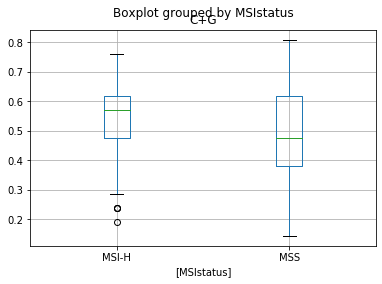

In [83]:
J1_G1.boxplot(by = 'MSIstatus')

MSI-H         AxesSubplot(0.1,0.15;0.363636x0.75)
MSS      AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

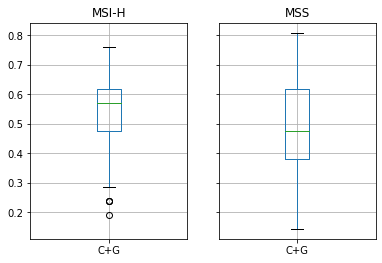

In [84]:
J1_G1.groupby('MSIstatus').boxplot()

MSI-H         AxesSubplot(0.1,0.15;0.363636x0.75)
MSS      AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

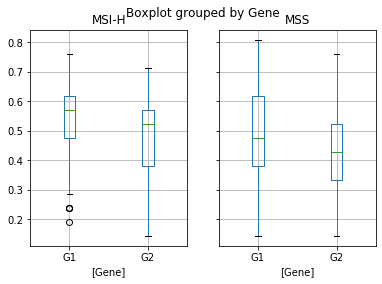

In [87]:
split21.groupby('MSIstatus').boxplot(by = 'Gene')

G1         AxesSubplot(0.1,0.15;0.363636x0.75)
G2    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

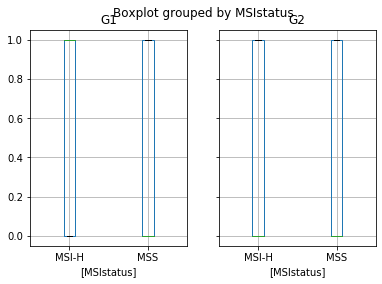

In [106]:
split1.groupby('Gene').boxplot(by = 'MSIstatus')

G1         AxesSubplot(0.1,0.15;0.363636x0.75)
G2    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

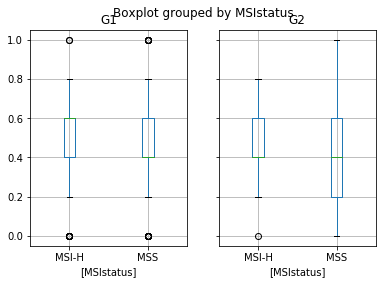

In [102]:
split5.groupby('Gene').boxplot(by = 'MSIstatus')

G1         AxesSubplot(0.1,0.15;0.363636x0.75)
G2    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

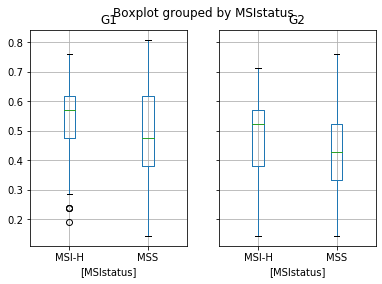

In [88]:
split21.groupby('Gene').boxplot(by = 'MSIstatus')

In [107]:
split1.groupby(["Junction", "Gene","MSIstatus"])['C+G'].agg([np.mean, np.std, np.size, np.sum])

mean       std   size   sum
Junction Gene MSIstatus                                 
J1       G1   MSI-H      0.565217  0.498445   92.0  52.0
              MSS        0.430464  0.496789  151.0  65.0
         G2   MSI-H      0.489130  0.502621   92.0  45.0
              MSS        0.377483  0.486371  151.0  57.0

In [108]:
split5.groupby(["Junction", "Gene","MSIstatus"])['C+G'].agg([np.mean, np.std, np.size, np.sum])

mean       std   size   sum
Junction Gene MSIstatus                                 
J1       G1   MSI-H      0.534783  0.227955   92.0  49.2
              MSS        0.491391  0.254805  151.0  74.2
         G2   MSI-H      0.482609  0.183140   92.0  44.4
              MSS        0.419868  0.217568  151.0  63.4

In [109]:
split21.groupby(["Junction", "Gene","MSIstatus"])['C+G'].agg([np.mean, np.std, np.size, np.sum])

mean       std   size        sum
Junction Gene MSIstatus                                      
J1       G1   MSI-H      0.546584  0.127165   92.0  50.285714
              MSS        0.473352  0.157285  151.0  71.476190
         G2   MSI-H      0.484472  0.133499   92.0  44.571429
              MSS        0.430148  0.145730  151.0  64.952381